In [14]:
from keras.datasets import reuters
import numpy as np
from keras import models
from keras import layers
import matplotlib.pyplot as plt

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

In [4]:
print('Train: ',len(train_data))

print('Test: ',len(test_data))

Train:  8982
Test:  2246


In [5]:
word_index = reuters.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])

557056/550378 [==============================] - 0s 0us/step


In [8]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [12]:
def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

def to_one_hot(labels, dimension = 46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [16]:
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [17]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [18]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs = 20,
                   batch_size = 512,
                   validation_data = (x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 35ms/step - loss: 2.6319 - accuracy: 0.5112 - val_loss: 1.7511 - val_accuracy: 0.6350
Epoch 2/20
16/16 [==============================] - 0s 21ms/step - loss: 1.4160 - accuracy: 0.7075 - val_loss: 1.3091 - val_accuracy: 0.7070
Epoch 3/20
16/16 [==============================] - 0s 21ms/step - loss: 1.0413 - accuracy: 0.7790 - val_loss: 1.1312 - val_accuracy: 0.7570
Epoch 4/20
16/16 [==============================] - 0s 19ms/step - loss: 0.8198 - accuracy: 0.8287 - val_loss: 1.0224 - val_accuracy: 0.7750
Epoch 5/20
16/16 [==============================] - 0s 19ms/step - loss: 0.6551 - accuracy: 0.8621 - val_loss: 0.9668 - val_accuracy: 0.7810
Epoch 6/20
16/16 [==============================] - 0s 20ms/step - loss: 0.5267 - accuracy: 0.8910 - val_loss: 0.9287 - val_accuracy: 0.7850
Epoch 7/20
16/16 [==============================] - 0s 19ms/step - loss: 0.4265 - accuracy: 0.9123 - val_loss: 0.8946 - val_accuracy: 0.8120
Epoch 8/20
16

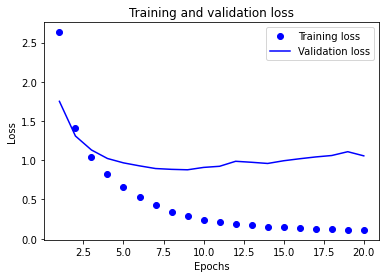

In [26]:
loss = history.history['loss']
val_loss = history.history['val_loss']
binary_accuracy = history.history['accuracy']
val_binary_accuracy = history.history['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

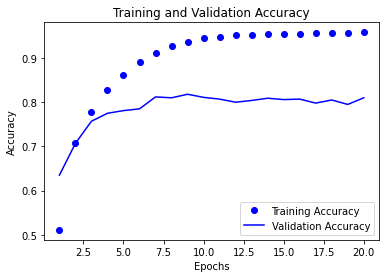

In [27]:
plt.clf()

plt.plot(epochs, binary_accuracy, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_binary_accuracy, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [29]:
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.fit(partial_x_train,
                   partial_y_train,
                   epochs = 9,
                   batch_size = 512,
                   validation_data = (x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 0s 21ms/step - loss: 2.9684 - accuracy: 0.5030 - val_loss: 1.9646 - val_accuracy: 0.6330
Epoch 2/9
16/16 [==============================] - 0s 20ms/step - loss: 1.5661 - accuracy: 0.6984 - val_loss: 1.3667 - val_accuracy: 0.6980
Epoch 3/9
16/16 [==============================] - 0s 19ms/step - loss: 1.1053 - accuracy: 0.7646 - val_loss: 1.1419 - val_accuracy: 0.7460
Epoch 4/9
16/16 [==============================] - 0s 18ms/step - loss: 0.8592 - accuracy: 0.8183 - val_loss: 1.0671 - val_accuracy: 0.7650
Epoch 5/9
16/16 [==============================] - 0s 18ms/step - loss: 0.6832 - accuracy: 0.8586 - val_loss: 0.9632 - val_accuracy: 0.7990
Epoch 6/9
16/16 [==============================] - 0s 19ms/step - loss: 0.5473 - accuracy: 0.8879 - val_loss: 0.9210 - val_accuracy: 0.8110
Epoch 7/9
16/16 [==============================] - 0s 22ms/step - loss: 0.4398 - accuracy: 0.9094 - val_loss: 0.8974 - val_accuracy: 0.8110
Epoch 8/9
16/16 [===

In [30]:
results

[1.0142701864242554, 0.7885128855705261]

In [31]:
predictions = model.predict(x_test)

In [32]:
predictions[0].shape

(46,)

In [33]:
np.sum(predictions[0])

0.9999998

In [34]:
np.argmax(predictions[0])

3

In [35]:
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(4, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.fit(partial_x_train,
                   partial_y_train,
                   epochs = 20,
                   batch_size = 128,
                   validation_data = (x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/20
63/63 [==============================] - 1s 11ms/step - loss: 2.9092 - accuracy: 0.2835 - val_loss: 2.1372 - val_accuracy: 0.5440
Epoch 2/20
63/63 [==============================] - 0s 7ms/step - loss: 1.7951 - accuracy: 0.5412 - val_loss: 1.6751 - val_accuracy: 0.5450
Epoch 3/20
63/63 [==============================] - 0s 8ms/step - loss: 1.4852 - accuracy: 0.5604 - val_loss: 1.5169 - val_accuracy: 0.5990
Epoch 4/20
63/63 [==============================] - 0s 7ms/step - loss: 1.3132 - accuracy: 0.6548 - val_loss: 1.4507 - val_accuracy: 0.6400
Epoch 5/20
63/63 [==============================] - 1s 9ms/step - loss: 1.1988 - accuracy: 0.6972 - val_loss: 1.4213 - val_accuracy: 0.6670
Epoch 6/20
63/63 [==============================] - 1s 9ms/step - loss: 1.1127 - accuracy: 0.7234 - val_loss: 1.4221 - val_accuracy: 0.6740
Epoch 7/20
63/63 [==============================] - 0s 8ms/step - loss: 1.0439 - accuracy: 0.7321 - val_loss: 1.3949 - val_accuracy: 0.6780
Epoch 8/20
63/63 [=